#Import nessessary libraries 

Install [this package](https://pypi.org/project/yfinance/).

In [1]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 6.3 MB 6.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.preprocessing import MinMaxScaler

import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, RNN, Dropout
from tensorflow.keras import optimizers

#Download stock price

Here is one example to get the close price of <font color = 'red'>SPDR Straits Times Index ETF (ES3.SI)</font> from Yahoo! Finance.

- `start`: start date
- `end`: end date
- `interval`: 1h, 1d, 1m ... (self-explanatory)

In [20]:
data_df = yf.download('O39.SI', start = '2020-12-06', interval = '1d',  end = '2021-12-06', progress = False)[['Close']]

In [21]:
print(data_df.head())
print("Number of sample = ", data_df.size)

            Close
Date             
2020-12-07   9.98
2020-12-08   9.99
2020-12-09  10.08
2020-12-10  10.03
2020-12-11   9.95
Number of sample =  251


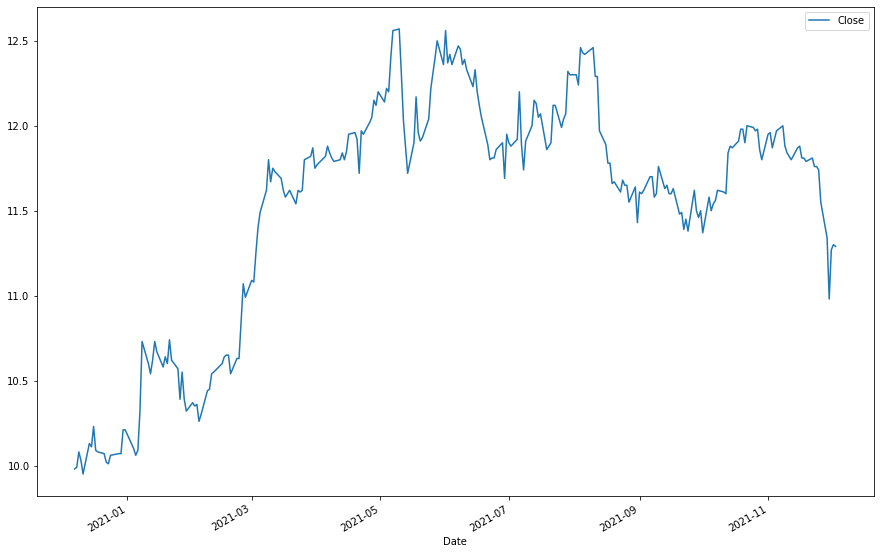

In [22]:
data_df.plot(figsize=(15,10))

In [63]:
price = data_df['Close']
price = price.to_numpy()
print(price.shape)

(251,)


In [64]:
training_time_series = price[:180]
test_time_series = price[180:]
print(training_time_series.shape)
print(test_time_series.shape)

(180,)
(71,)


In [92]:
def split_sequence_stepahead(sequence, window_length, step_ahead):
  X, y = list(), list()

  for i in range(len(sequence)):
    if (i+window_length+step_ahead)>(len(sequence)):
      break
    X_temp, y_temp = sequence[i:i+window_length],sequence[i+window_length:i+window_length+step_ahead]
    X.append(X_temp)
    y.append(y_temp)

  return np.asarray(X), np.asarray(y)   

In [48]:
def split_sequence(sequence, window_length):
  X, y = list(), list()

  for i in range(0, len(sequence) - window_length):
    X_temp, y_temp = sequence[i : i + window_length], sequence[i + window_length]

    X.append(X_temp)
    y.append(y_temp)

  return np.asarray(X), np.asarray(y) 

In [65]:
my_scaler = MinMaxScaler()

training_data_scaled = my_scaler.fit_transform(training_time_series.reshape(-1,1))
test_data_scaled = my_scaler.transform(test_time_series.reshape(-1,1))



In [66]:
print("Size of training_data_scaled: ", training_data_scaled.shape)
print("Size of test_data_scaled: ", test_data_scaled.shape)

Size of training_data_scaled:  (180, 1)
Size of test_data_scaled:  (71, 1)


In [68]:
window_length = 10

X_train, y_train = split_sequence(training_data_scaled, window_length)

#for i in range(len(X)):
  #print(X[i], y[i])

print("Size of X:", X_train.shape)
print("Size of y:", y_train.shape)

Size of X: (170, 10, 1)
Size of y: (170, 1)


In [69]:
X_test, y_test = split_sequence(test_data_scaled, window_length)

In [70]:
print("Size of X:", X_test.shape)
print("Size of y:", y_test.shape)

Size of X: (61, 10, 1)
Size of y: (61, 1)


#Build your stock predictor!

Free to build your own predictor and test it.

Suggestions:

- Use multiple-layer LSTM

- Use `dropout` and `recurrent_dropdout`

The structure can be:

Input $\longrightarrow$ LSTM(dropout & recurrent_dropput) $\longrightarrow$  LSTMLSTM(dropout & recurrent_dropput) $\longrightarrow$ Ouput

In [71]:
model1 = Sequential()
model1.add(LSTM(10, activation='relu', input_shape=(10,1)))
model1.add(Dense(1))  
optimizer = optimizers.Adam(learning_rate = 0.005)
model1.compile(loss = "mse", optimizer = optimizer)

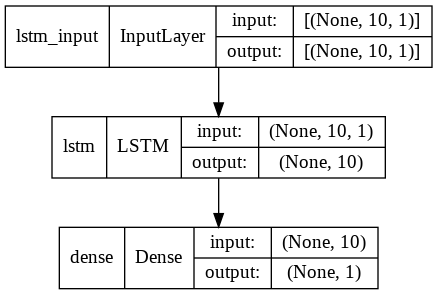

In [90]:
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

In [72]:
history1 = model1.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/20
6/6 [==============================] - 4s 105ms/step - loss: 0.3174 - val_loss: 0.1567
Epoch 2/20
6/6 [==============================] - 0s 39ms/step - loss: 0.0996 - val_loss: 0.0103
Epoch 3/20
6/6 [==============================] - 0s 41ms/step - loss: 0.0215 - val_loss: 0.0389
Epoch 4/20
6/6 [==============================] - 0s 45ms/step - loss: 0.0285 - val_loss: 0.0039
Epoch 5/20
6/6 [==============================] - 0s 41ms/step - loss: 0.0114 - val_loss: 0.0099
Epoch 6/20
6/6 [==============================] - 0s 42ms/step - loss: 0.0168 - val_loss: 0.0067
Epoch 7/20
6/6 [==============================] - 0s 42ms/step - loss: 0.0109 - val_loss: 0.0039
Epoch 8/20
6/6 [==============================] - 0s 46ms/step - loss: 0.0102 - val_loss: 0.0054
Epoch 9/20
6/6 [==============================] - 0s 42ms/step - loss: 0.0095 - val_loss: 0.0036
Epoch 10/20
6/6 [==============================] - 0s 42ms/step - loss: 0.0090 - val_loss: 0.0043
Epoch 11/20
6/6 [===========

In [74]:
def plot_learning_curves(loss, val_loss):
    plt.figure(figsize = (8,6))
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label = "Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label = "Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

def plot_yt_ypred(y_test, y_pred, label1, label2):
    plt.figure(figsize = (8,6))
    plt.plot(y_test,'-', label = label1)
    plt.plot(y_pred,'-rx', label = label2)
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend()
    plt.grid()
    plt.show()

In [76]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.preprocessing import MinMaxScaler

import keras

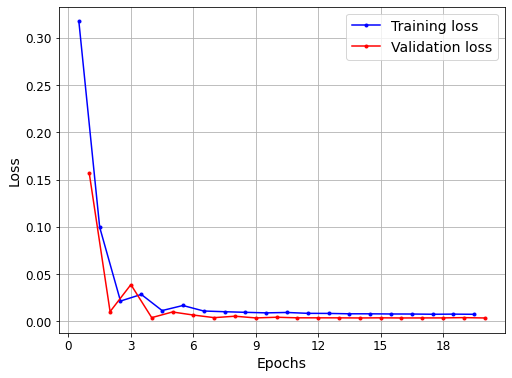

In [77]:
plot_learning_curves(history1.history["loss"], history1.history["val_loss"])

In [78]:
y_pred_model1 = model1.predict(X_test)

rmse_model1 = np.sqrt(np.mean(keras.losses.mean_squared_error(y_test, y_pred_model1)))
print("RMSE of model1 = ", rmse_model1)

RMSE of model1 =  0.059702817


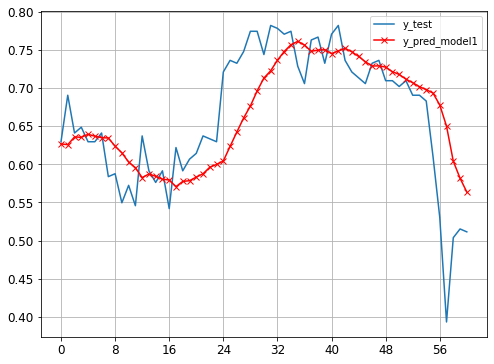

In [79]:
plot_yt_ypred(y_test, y_pred_model1, 'y_test', 'y_pred_model1')

##Experimenting with Model 2 with dropout features ##
The model should be **underfitting**. Expect performance to be poorer than Model 1.

In [85]:
model2 = Sequential()
model2.add(LSTM(10, activation='relu', dropout=0.1, recurrent_dropout=0.1, return_sequences=True, input_shape=(10,1)))
model2.add(LSTM(10, activation='relu', dropout=0.1, recurrent_dropout=0.1))
model2.add(Dense(1))  
optimizer = optimizers.Adam(learning_rate = 0.005)
model2.compile(loss = "mse", optimizer = optimizer)

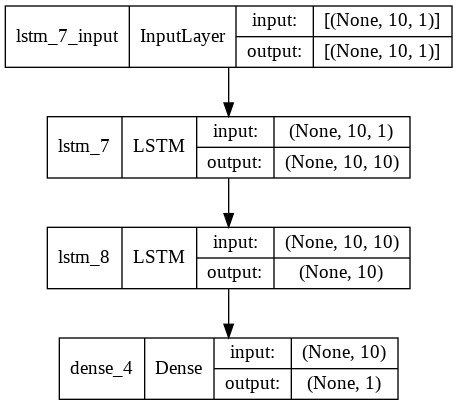

In [91]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

In [86]:
history2 = model2.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/20
6/6 [==============================] - 7s 281ms/step - loss: 0.3746 - val_loss: 0.1836
Epoch 2/20
6/6 [==============================] - 1s 163ms/step - loss: 0.1008 - val_loss: 0.0362
Epoch 3/20
6/6 [==============================] - 1s 174ms/step - loss: 0.0551 - val_loss: 0.0076
Epoch 4/20
6/6 [==============================] - 1s 165ms/step - loss: 0.0290 - val_loss: 0.0203
Epoch 5/20
6/6 [==============================] - 1s 162ms/step - loss: 0.0305 - val_loss: 0.0051
Epoch 6/20
6/6 [==============================] - 1s 169ms/step - loss: 0.0231 - val_loss: 0.0105
Epoch 7/20
6/6 [==============================] - 1s 161ms/step - loss: 0.0240 - val_loss: 0.0051
Epoch 8/20
6/6 [==============================] - 1s 167ms/step - loss: 0.0186 - val_loss: 0.0064
Epoch 9/20
6/6 [==============================] - 1s 157ms/step - loss: 0.0203 - val_loss: 0.0049
Epoch 10/20
6/6 [==============================] - 1s 169ms/step - loss: 0.0209 - val_loss: 0.0051
Epoch 11/20
6/6 [==

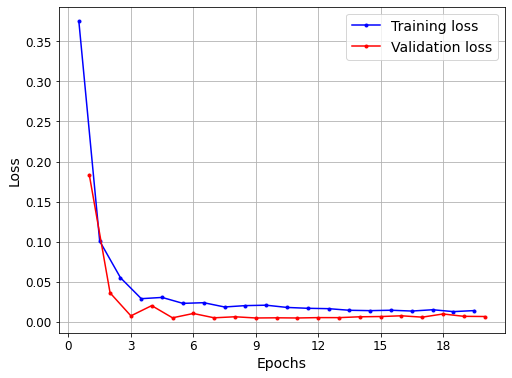

In [87]:
plot_learning_curves(history2.history["loss"], history2.history["val_loss"])

In [88]:
y_pred_model2 = model2.predict(X_test)

rmse_model2 = np.sqrt(np.mean(keras.losses.mean_squared_error(y_test, y_pred_model2)))
print("RMSE of model2 = ", rmse_model2)

RMSE of model2 =  0.0821488


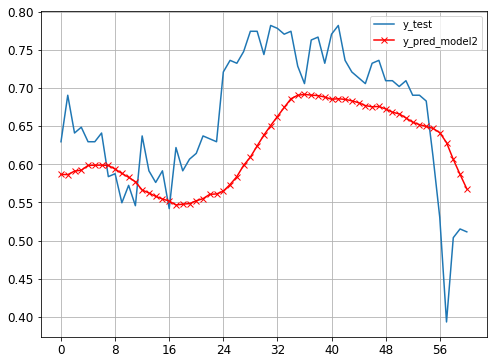

In [89]:
plot_yt_ypred(y_test, y_pred_model2, 'y_test', 'y_pred_model2')

In [93]:
window_length = 10

X_train, y_train = split_sequence_stepahead(training_data_scaled, window_length, 3)

#for i in range(len(X)):
  #print(X[i], y[i])

print("Size of X:", X_train.shape)
print("Size of y:", y_train.shape)

Size of X: (168, 10, 1)
Size of y: (168, 3, 1)


In [94]:
X_test, y_test = split_sequence_stepahead(test_data_scaled, window_length, 3)

In [122]:
model3 = Sequential()
model3.add(LSTM(10, activation='relu', input_shape=(10,1)))
model3.add(Dense(3))  
optimizer = optimizers.Adam(learning_rate = 0.005)
model3.compile(loss = "mse", optimizer = optimizer)

In [123]:
history3 = model3.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/20
6/6 [==============================] - 2s 147ms/step - loss: 0.4369 - val_loss: 0.3007
Epoch 2/20
6/6 [==============================] - 0s 40ms/step - loss: 0.2572 - val_loss: 0.1570
Epoch 3/20
6/6 [==============================] - 0s 40ms/step - loss: 0.1355 - val_loss: 0.0793
Epoch 4/20
6/6 [==============================] - 0s 48ms/step - loss: 0.0714 - val_loss: 0.0306
Epoch 5/20
6/6 [==============================] - 0s 46ms/step - loss: 0.0275 - val_loss: 0.0062
Epoch 6/20
6/6 [==============================] - 0s 47ms/step - loss: 0.0132 - val_loss: 0.0063
Epoch 7/20
6/6 [==============================] - 0s 48ms/step - loss: 0.0154 - val_loss: 0.0093
Epoch 8/20
6/6 [==============================] - 0s 41ms/step - loss: 0.0166 - val_loss: 0.0077
Epoch 9/20
6/6 [==============================] - 0s 45ms/step - loss: 0.0138 - val_loss: 0.0050
Epoch 10/20
6/6 [==============================] - 0s 45ms/step - loss: 0.0115 - val_loss: 0.0041
Epoch 11/20
6/6 [===========

In [124]:
y_pred_model3 = model3.predict(X_test)

In [125]:
y_pred_model3.shape

(59, 3)

In [126]:
y_pred_model3 = y_pred_model3.reshape(-1,3,1)

In [127]:
y_pred_model3.shape

(59, 3, 1)

In [128]:
rmse_model3 = np.sqrt(np.mean(keras.losses.mean_squared_error(y_test, y_pred_model3)))
print("RMSE of model3 = ", rmse_model3)

RMSE of model3 =  0.06354841


In [129]:
STEP=1

In [130]:
def create_time_steps(length):
  return list(range(-length, 0))

In [131]:
def multi_step_plot(series, y, y_pred):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(series))
  num_out = len(y)

  plt.plot(num_in, np.array(series[:]), label='Series')
  plt.plot(np.arange(num_out)/STEP, np.array(y), 'bo',
           label='True')
  if y_pred.any():
    plt.plot(np.arange(num_out)/STEP, np.array(y_pred), 'ro',
             label='Prediction')
  plt.legend(loc='upper left')
  plt.show()

In [132]:
y_test.shape

(59, 3, 1)

In [133]:
X_test.shape

(59, 10, 1)

In [134]:
y_pred_model3.shape

(59, 3, 1)

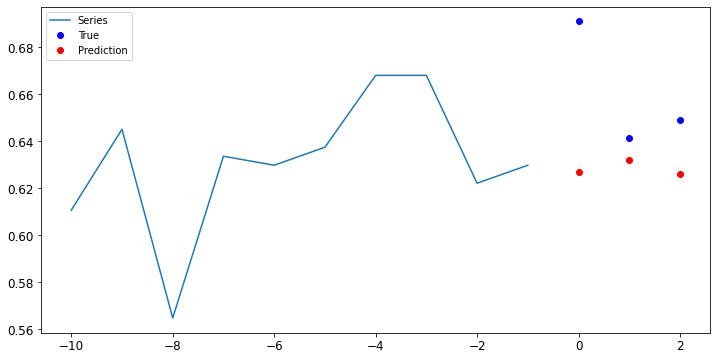

In [135]:
multi_step_plot(X_test[1], y_test[1], y_pred_model3[1])